<a href="https://colab.research.google.com/github/Shampat/hello-world/blob/master/Covid-19%20sep26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

In [101]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-27-2020.csv'

In [102]:
df = pd.read_csv(path)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3259 non-null   float64
 1   Admin2               3264 non-null   object 
 2   Province_State       3787 non-null   object 
 3   Country_Region       3955 non-null   object 
 4   Last_Update          3955 non-null   object 
 5   Lat                  3874 non-null   float64
 6   Long_                3874 non-null   float64
 7   Confirmed            3955 non-null   int64  
 8   Deaths               3955 non-null   int64  
 9   Recovered            3955 non-null   int64  
 10  Active               3952 non-null   float64
 11  Combined_Key         3955 non-null   object 
 12  Incidence_Rate       3874 non-null   float64
 13  Case-Fatality_Ratio  3907 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 432.7+ KB


In [104]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-28 04:23:36,33.93911,67.709953,39227,1453,32642,5132.0,Afghanistan,100.767202,3.704081
1,NaN,NaN,NaN,Albania,2020-09-28 04:23:36,41.15330,20.168300,13259,377,7397,5485.0,Albania,460.733894,2.843352
2,NaN,NaN,NaN,Algeria,2020-09-28 04:23:36,28.03390,1.659600,51067,1714,35860,13493.0,Algeria,116.455611,3.356375
3,NaN,NaN,NaN,Andorra,2020-09-28 04:23:36,42.50630,1.521800,1836,53,1263,520.0,Andorra,2376.237624,2.886710
4,NaN,NaN,NaN,Angola,2020-09-28 04:23:36,-11.20270,17.873900,4718,174,1707,2837.0,Angola,14.355144,3.688003


In [105]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)


In [106]:
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,33.93911,67.709953,39227,1453,32642,5132.0,100.767202,3.704081
1,Albania,41.15330,20.168300,13259,377,7397,5485.0,460.733894,2.843352
2,Algeria,28.03390,1.659600,51067,1714,35860,13493.0,116.455611,3.356375
3,Andorra,42.50630,1.521800,1836,53,1263,520.0,2376.237624,2.886710
4,Angola,-11.20270,17.873900,4718,174,1707,2837.0,14.355144,3.688003


In [120]:
top_20 = df.sort_values(by=['Confirmed'], ascending=False).head(20)

In [128]:
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

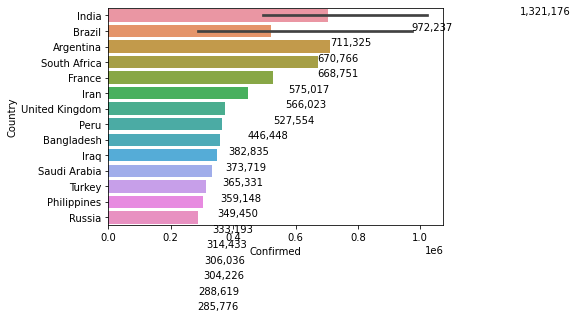

In [131]:
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [133]:
top_5 = df.sort_values(by=['Confirmed'], ascending=False).head()

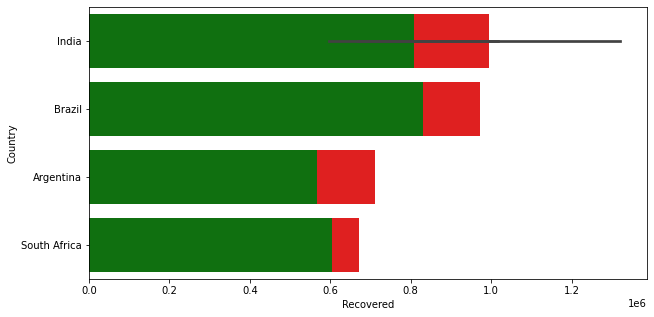

In [135]:
plt.figure(figsize=(10,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

In [144]:
figure = px.choropleth(df,locations='Country',
                       locationmode='country names', 
                       color='Confirmed', hover_name='Country', 
                       color_continuous_scale='tealgrn', 
                       range_color=[1,1000000],
                       title='Countries with Confirmed cases')
figure.show()